## Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу для квазилинейного уравнением переноса:

$$
\left\{\begin{array}{lcl}
\frac{\partial u}{\partial t} + {\arctan u}  \frac{\partial u}{\partial x} = 0, \ ~ 0 < x \leq 1, \\
u(x,0) = \sin \pi x, \\
u(0,t) = 0.
\end{array}\\
\right. $$

## Исследование задачи

### Исследование характеристик

В точках пересечения проекций его характеристик решение будет разрывным. Посмотрим, как будут вести себя проекции характеристик в заданных областях. Уравнение характеристик будет иметь вид 

$$ ~~dt=\frac{dx}{\arctan u}$$

Преобразуем его

$$ \int_{t_o}^{t}dt=\int_{x_o}^{x} \frac{dx}{\arctan u}
t=\frac{x - x_0}{\arctan u}+t_0$$

Воспользуемся начальным и граничным условиями для получения двух семейств кривых:

$$
\begin{aligned}
&1) \ t_0=0:x=x_0 + t \arctan(\sin \pi x_0 ) \\
&2) \ x_0=0:x=0 
\end{aligned}
$$

Необходимо будет построить соответсвующие графики и проверить их на отсутствие пересечений кривых.

### Проверка устойчивости по спектральному критерию Неймана

Зафиксируем коэффициент перед производной по координате. Разностная схема будет иметь вид:

$$\frac{y^{m+1}_n - y^m_{n}}{\tau} + C \frac{y^{m+1}_{n} + y^{m+1}_{n-1}}{h}=0,~~~~ где \ введено \ обозначение \ C= \arctan y^{m+1}_n.$$

Будем искать решение в виде 

$$y^{m+1}_{n} = \lambda^m e^{i\alpha n}$$

Подставляя, получаем:

$$\lambda = \frac{1}{1+r-re^{-i \omega}}, ~где ~~~ r=\frac{C \tau}{h}$$

В данной задаче $С$ по смыслу всюду положительно, так что условие |𝜆($\omega$)|≤1 выполнено для любых значений шага по времени и координате, следовательно, спектральный критерий Неймана выполнен для любых τ и ℎ.

## Численное решение

### Сетка

Введем в области $$\Omega=\{(x,t):0<x\leq1,~~0\leq t<2\} $$ сетку с шагом $h$ по $x$ и шагом $\tau$ по $t$:
\begin{eqnarray}
\omega_{h, ~ \tau }=\begin{cases}
x_n=n\cdot h, ~~h=\frac{1}{N}, ~~n=\overline{0, N}\\
t_m=m\cdot \tau , ~~\tau =\frac{2}{M}, ~~m=\overline{0, M}
\end{cases}
\end{eqnarray}

На $\omega_{h, ~ \tau}$ будем рассматривать сеточную функцию $y^m_{n}=u(x_n,t_m)$

### Разностная схема

Для рассматриваемой задачи будем использовать неявную разностную схему с трехточечным шаблоном. Она безусловно устойчива и аппроксимирует задачу как $O(h + \tau )$.

$$\frac{y^{m+1}_n - y^m_{n}}{\tau} + \arctan y^{m+1}_n \frac{y^{m+1}_{n} + y^{m+1}_{n-1}}{h}=0,$$

Методом Ньютона на каждом шаге будем находить $y^{m+1}_{n}$ с заданной точностью, используя сперва начальные и граничные условия, а затем рассчитанные значения.


## Код программы

### Исследование области поиска решения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
M = 200
T = np.linspace(0, 1, M)

In [3]:
C_num = 50
C = np.empty((C_num, len(T)))
x0 = np.linspace(0, 1, C_num)
for i in range(C_num):
    C[i] = x0[i] + T * np.arctan(np.sin(np.pi * x0[i]))

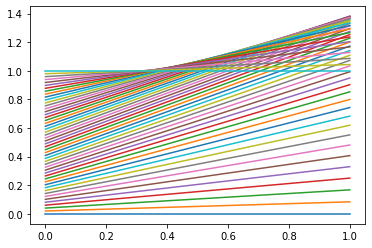

In [4]:
plt.plot(T, C.T)
print()

Как видно, при некотором $t_{max}$ характеристики начинают пересекаться. Найдем это значение и будем решать задачу на интерывале $0\leq t<t_{max}$, где характеристики не пересекаются, а значит решение будет представимо через разностную схему.